Variable Notes

*pclass*: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

*age*: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

*sibsp*: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

*parch*: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

*embarked* - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)


In [295]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from collections import Counter
from sklearn.metrics import accuracy_score
from sklearn import model_selection
from sklearn import preprocessing
import warnings
warnings.filterwarnings("ignore")

In [296]:
df=pd.read_csv(r"E:\data\train-titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [297]:
''''''

''

In [298]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [299]:
df.shape

(891, 12)

# Data Visualization

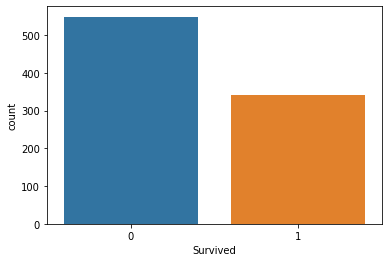

In [300]:
sns.countplot("Survived",data=df)

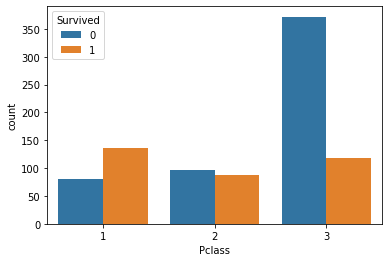

In [301]:
sns.countplot('Pclass',hue='Survived',data=df)

In [302]:
def plot(sd):
    list1=["Pclass","Sex","SibSp","Parch"]
    for i in list1:
        sns.countplot(i,hue="Survived",data=df)
        print("Graph of",i)
        plt.show()

Graph of Pclass


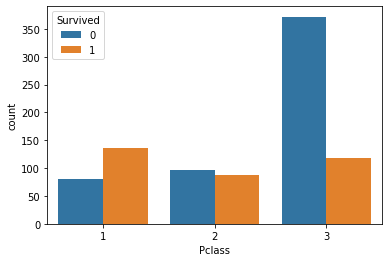

Graph of Sex


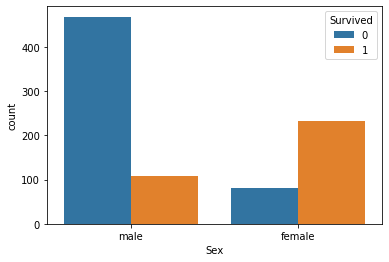

Graph of SibSp


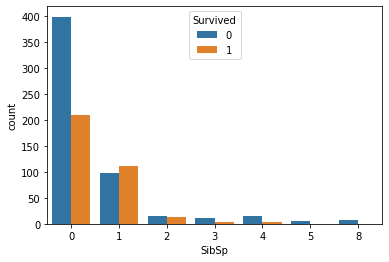

Graph of Parch


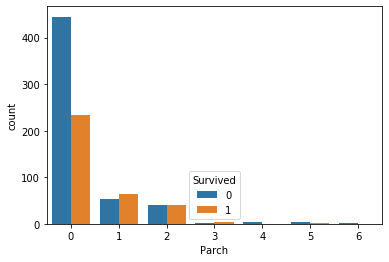

In [303]:
plot('Pclass')

## Observation
1. In Pclass: People of lower class died the most as compared to the upper and middle class
2. In Sex: Mostly male passengers died in the tragic incident
3. In SibSp: Passengers with no sibblings/spouse died most and they survived the most

(array([ 40.,  22.,  16.,  86., 114., 106.,  95.,  72.,  48.,  41.,  32.,
         16.,  15.,   4.,   6.,   0.,   1.,   0.,   0.,   0.]),
 array([  0.,   5.,  10.,  15.,  20.,  25.,  30.,  35.,  40.,  45.,  50.,
         55.,  60.,  65.,  70.,  75.,  80.,  85.,  90.,  95., 100.]),
 <a list of 20 Patch objects>)

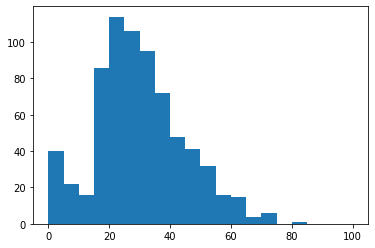

In [304]:
plt.hist(df["Age"],bins=20,range=(0,100))

*OBSERVATION*
1. We see that the most of the passengers are in the age near the age of 13-18[As we substituted the null values with 13]
2. Large proportion of the passengers are between the age of 20-40


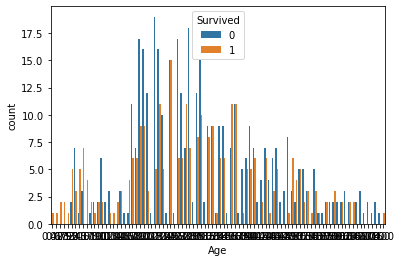

In [305]:
sns.countplot('Age',hue='Survived',data=df)

In [306]:
def age_bracket(ab):
    for i in range(len(df["Age"])):
        if ab>=0 and ab<=20:
            return 0
        elif ab>21 and ab<=40:
            return 1
        elif ab>41 and ab<=60:
            return 2
        elif ab>61 and ab<=85:
            return 3
    

df["Age_bracket"]=df["Age"].apply(lambda x:age_bracket(x))


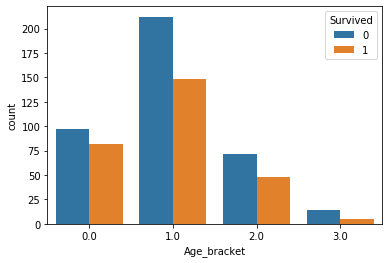

In [307]:
sns.countplot('Age_bracket',hue='Survived',data=df)

In the above graph we see that passengers with the age bracket of 20-40 died the most and they lived the most.From these stats we can find out the male female ratio of the passengers who survived. 

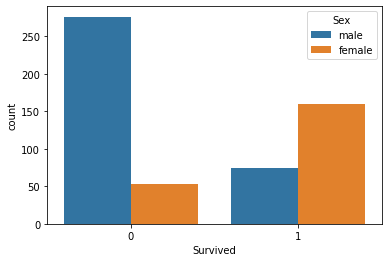

In [308]:
#Find out the ratio of male female between 20-40 who survived
df_age_ratio=df[df["Age"]>=21]
df_age_ratio=df[df["Age"]<=40]
sns.countplot("Survived",hue='Sex',data=df_age_ratio)

We observe in the ablove graph that the number of men died the most and the number of women survived the most 

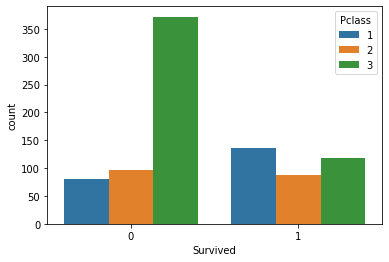

In [309]:
sns.countplot("Survived",hue='Pclass',data=df)

The passegers of the lower class died the most as compared to the upper and middle class

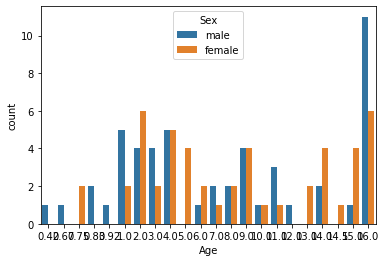

In [310]:
# Find out the male female ratio of childern
df_children=df[df["Age"]<=16]
sns.countplot("Age",hue="Sex",data=df_children)

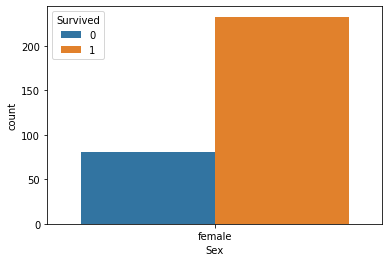

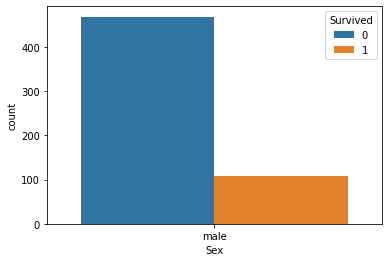

In [311]:
df_female=df[df["Sex"]=='female']
df_male=df[df['Sex']=='male']
sns.countplot('Sex',hue='Survived',data=df_women)
plt.show()
sns.countplot('Sex',hue="Survived",data=df_male)
plt.show()

We observe that most of the women survived and most of the men died 

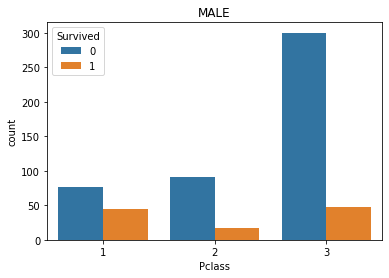

Text(0.5, 1.0, 'FEMALE')

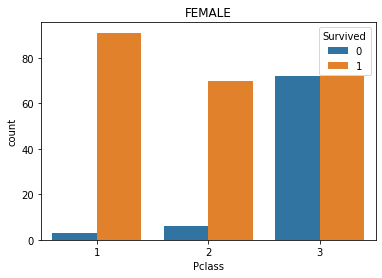

In [312]:
#sns.countplot(Pclass',hue="Survived",Data=df_male)
sns.countplot('Pclass',hue="Survived",data=df_male)
plt.title("MALE")
plt.show()

sns.countplot('Pclass',hue='Survived',data=df_female)
plt.title("FEMALE")

We observe that the lower middle class didn't survived and msot of the female survived from the first class

# Data Preprocessing

In [313]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  Age_bracket  678 non-null    float64
dtypes: float64(3), int64(5), object(5)
memory usage: 90.6+ KB


In [314]:
df_pre=df.copy()

In [315]:
df_dum1=pd.get_dummies(df_pre["Embarked"],drop_first=True)
# Concatenating the dataframe
df_pre=pd.concat([df_pre,df_dum1,df_dum2], axis=1)

In [316]:
#Substituting the null values in age with the median
age=len(df_pre['Age'])
med_age=(age+1)//2
t=df_pre["Age"].values[med_age]
df_pre["Age"].fillna(t,inplace=True)



#Substituiting male=1 and female=0
def Sex(s):
    if s== 'male':
        return 1
    return 0
df_pre["Sex"]=df_pre["Sex"].apply(lambda x:Sex(x))




In [317]:
df_pre.drop(columns=['PassengerId','Name', 'Ticket', 'Fare', 'Cabin','Age_bracket','Embarked'],inplace=True,axis=1)

In [318]:
df_pre

,Survived,Pclass,Sex,Age,SibSp,Parch,Q,S,male
0,0,3,1,22.0,1,0,0,1,1
1,1,1,0,38.0,1,0,0,0,0
2,1,3,0,26.0,0,0,0,1,0
3,1,1,0,35.0,1,0,0,1,0
4,0,3,1,35.0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,0,1,1
887,1,1,0,19.0,0,0,0,1,0
888,0,3,0,13.0,1,2,0,1,0
889,1,1,1,26.0,0,0,0,0,1


# Applying KNN model 

In [322]:
x=df_pre.drop(columns=['Survived'],axis=1)

In [323]:
y=df_pre['Survived']

In [362]:
x_1,x_test,y_1,y_test=model_selection.train_test_split(x,y, test_size=0.3, random_state=0)

In [361]:
# Checking the accuracy of the algorithm using K-NN
for i in range(1,100,2):
        knn=KNeighborsClassifier(n_neighbors=i)
        knn.fit(x_1,y_1)
        pred=knn.predict(x_test)
        acc=accuracy_score(y_test, pred,normalize=True)*float(100)
        print("\nCV accuracy for k = %d is %d%%" %(i,acc))
        


CV accuracy for k = 1 is 77%

CV accuracy for k = 3 is 80%

CV accuracy for k = 5 is 77%

CV accuracy for k = 7 is 77%

CV accuracy for k = 9 is 77%

CV accuracy for k = 11 is 80%

CV accuracy for k = 13 is 79%

CV accuracy for k = 15 is 77%

CV accuracy for k = 17 is 78%

CV accuracy for k = 19 is 77%

CV accuracy for k = 21 is 76%

CV accuracy for k = 23 is 75%

CV accuracy for k = 25 is 74%

CV accuracy for k = 27 is 74%

CV accuracy for k = 29 is 74%

CV accuracy for k = 31 is 73%

CV accuracy for k = 33 is 73%

CV accuracy for k = 35 is 73%

CV accuracy for k = 37 is 72%

CV accuracy for k = 39 is 73%

CV accuracy for k = 41 is 72%

CV accuracy for k = 43 is 72%

CV accuracy for k = 45 is 70%

CV accuracy for k = 47 is 70%

CV accuracy for k = 49 is 70%

CV accuracy for k = 51 is 69%

CV accuracy for k = 53 is 70%

CV accuracy for k = 55 is 69%

CV accuracy for k = 57 is 69%

CV accuracy for k = 59 is 69%

CV accuracy for k = 61 is 69%

CV accuracy for k = 63 is 67%

CV accuracy 

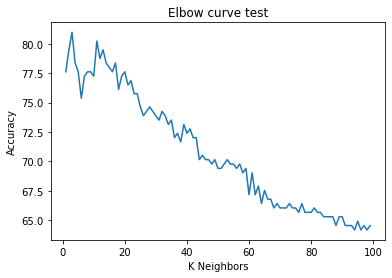

In [363]:
#Checking the accuracy of the algorithm graphically
def Elbow(r):
    test_mse=[]
    for i in r:
        knn=KNeighborsClassifier(n_neighbors=i)
        knn.fit(x_1,y_1)
        pred=knn.predict(x_test)
        acc=accuracy_score(y_test, pred,normalize=True)*float(100)
        #print("\nCV accuracy for k = %d is %d%%" %(i,acc))
        test_mse.append(acc)
    return test_mse

k=range(1,100)
test=Elbow(k)

#Plotting the graph
plt.plot(k,test)
plt.xlabel('K Neighbors')
plt.ylabel("Accuracy")
plt.title("Elbow curve test")
plt.show()

In [364]:
n_neighbors=11
knn=KNeighborsClassifier(11)
knn.fit(x_1,y_1)
pred=knn.predict(x_test)
acc=accuracy_score(y_test, pred, normalize=True)*float(100)
print('CV accuracy for %d is %d%%'%(n_neighbors,acc))

CV accuracy for 11 is 80%
